In [1]:
"""
clone and install dependencies in Colab
GPU not yet supported
"""
import os, sys
if 'google.colab' in sys.modules:
    %cd /content
    if not os.path.isdir('catastrophicForgetting'):
        !git clone --depth 1 https://github.com/Michaeldz36/catastrophicForgetting.git
        %cd catastrophicForgetting
    else:
        %cd catastrophicForgetting
        !git pull
import os, sys
if 'google.colab' in sys.modules:
    %cd /content/catastrophicForgetting
else:
    sys.path.insert(0, os.path.join(os.getcwd(), '../..'))

In [2]:
# imports, do not modify
from research.main import simulate, plot_history
from utils.utils import Setup

In [3]:
# instantiate setup, do not modify
setup = Setup()

In [4]:
# hyperparameters, can be modified
N = setup.N * 1
batch_size = setup.P * 1
P1 = setup.P * 1
P2 = setup.P * 2
sgm_e = setup.sgm_e
sgm_w1 = setup.sgm_w * 1
sgm_w2 = setup.sgm_w * 2
learning_rate = 1e-1
epochs1 = 150
epochs2 = 150

Realisation 0/10
Lesson 1/2:
--------------------
Epoch 50/150
----------
train Loss: 0.0001
val Loss: 2.0887
cross_gen Loss: 2.3517


Epoch 100/150
----------
train Loss: 0.0000
val Loss: 2.0935
cross_gen Loss: 2.3384


Epoch 150/150
----------
train Loss: 0.0000
val Loss: 2.0924
cross_gen Loss: 2.3362


Lesson 2/2:
--------------------
Epoch 50/150
----------
train Loss: 0.0194
val Loss: 0.1104
cross_gen Loss: 0.9841


Epoch 100/150
----------
train Loss: 0.0152
val Loss: 0.2136
cross_gen Loss: 1.0873


Epoch 150/150
----------
train Loss: 0.0138
val Loss: 0.2994
cross_gen Loss: 1.1526


Realisation 1/10
Lesson 1/2:
--------------------
Epoch 50/150
----------
train Loss: 0.0000
val Loss: 2.3004
cross_gen Loss: 1.9265


Epoch 100/150
----------
train Loss: 0.0000
val Loss: 2.2828
cross_gen Loss: 1.9150


Epoch 150/150
----------
train Loss: 0.0000
val Loss: 2.2818
cross_gen Loss: 1.9142


Lesson 2/2:
--------------------
Epoch 50/150
----------
train Loss: 0.0091
val Loss: 0.3492
cro

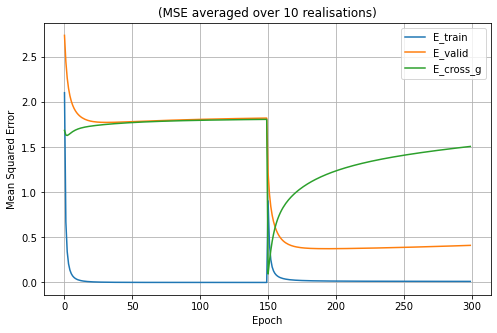

In [11]:
# main simulation
"""
Creates a pair of Teachers (T1, T2),
each teacher generates:
 -P examples of N-parameter random vectors X generated from normal distribution
with variance sgm_w**2
 -P examples of linear signal Y created from random vectors.
 A simple white noise with variance sgm_e**2 is added to the signals.

Generated data is splitted with 2:1 ratio for training/validation purposes.

Creates Student model, together with SGD optimizer with learning ratio lr and MSE loss function.
Prepares training, validation and cross-generalization datasets with scaling of the input vectors.

Runs 2 subsequent lessons runned for epochs1 and epochs2 time.
Returns dictionary with training, validation and cross generalization errors for full simulation
Uses setup organised into "syllabus" list, repeats simulation n_runs times and averages over realisation.
Finally plots resulting errors.
"""

syllabus=[N,
          P1, P2,
          sgm_w1, sgm_w2,
          sgm_e, learning_rate,
          epochs1, epochs2]
n_runs=10
errors = simulate(syllabus, n_runs)
plot_history(errors, n_runs)

